In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('rainfall_cleaned.csv', parse_dates=[0], dayfirst=True, index_col = 0)

In [3]:
data.head()

,Year,Month,Day,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp
Timestamp,,,,,,,,,,
1987-09-01,1987,9,1,Autumn,0.0,0.0,NaN,0.128,1000.0,41.5
1987-09-02,1987,9,2,Autumn,0.0,0.0,NaN,0.128,NaN,44.5
1987-09-03,1987,9,3,Autumn,0.0,0.0,NaN,0.128,NaN,43.6
1987-09-04,1987,9,4,Autumn,0.0,0.0,NaN,0.128,NaN,42.8
1987-09-05,1987,9,5,Autumn,0.0,0.0,NaN,0.128,NaN,44.7


In [4]:
data.describe()

,Year,Month,Day,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp
count,1461.000000,1461.000000,1461.000000,962.000000,1399.000000,337.000000,1461.000000,1.0,1459.000000
mean,1989.164956,6.522930,15.729637,2.446985,2.681201,16.442433,10.281414,1000.0,30.286977
std,1.213860,3.449884,8.803105,6.640759,9.295415,22.800884,37.679309,NaN,10.275819
min,1987.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.060000,1000.0,-11.900000
25%,1988.000000,4.000000,8.000000,0.000000,0.000000,1.500000,0.212000,1000.0,25.400000
50%,1989.000000,7.000000,16.000000,0.000000,0.000000,6.700000,1.340000,1000.0,31.600000
75%,1990.000000,10.000000,23.000000,0.000000,0.000000,20.200000,5.660000,1000.0,37.300000
max,1991.000000,12.000000,31.000000,58.000000,110.000000,151.100000,670.000000,1000.0,48.500000


In [5]:
data.dtypes

Year                  int64
Month                 int64
Day                   int64
season               object
Rainfall_St1        float64
Rainfall_St2        float64
Rainfall_St3        float64
Discharge           float64
surface_area_St1    float64
Temp                float64
dtype: object

# EDA - Plot time series

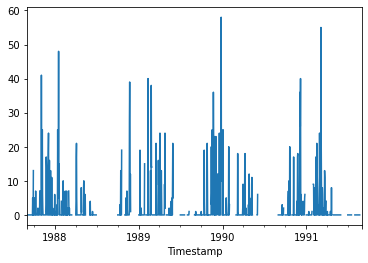

In [6]:
#pandas build in
data.Rainfall_St1.plot();

Pattern can be observed - have a closer look:

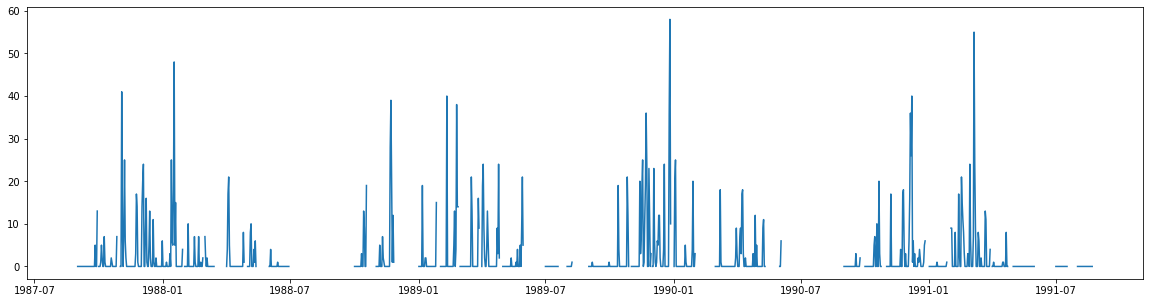

In [7]:
#matplotlib for time-axis
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data.Rainfall_St1);

Rainy season around january, dry season from July-Sept

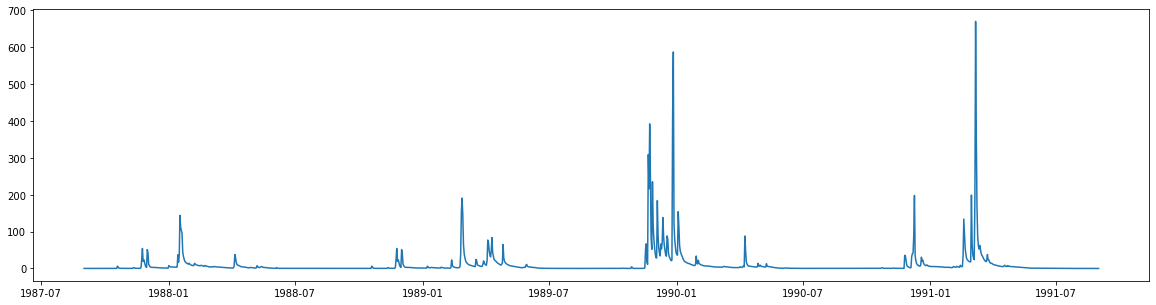

In [8]:
#target
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data.Discharge);

we already can see a strong correalation

In [9]:
temp = data[data.Year.isin([1988,1989,1990])]

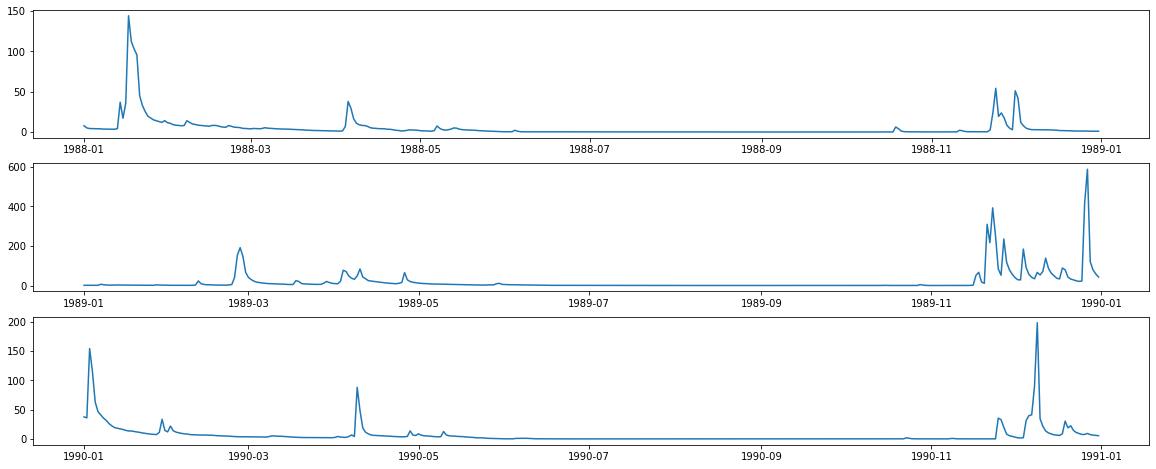

In [10]:
fig, axs = plt.subplots(3, figsize=(20,8))
for i, group in enumerate(temp.groupby('Year')):
    axs[i].plot(group[1].Discharge)

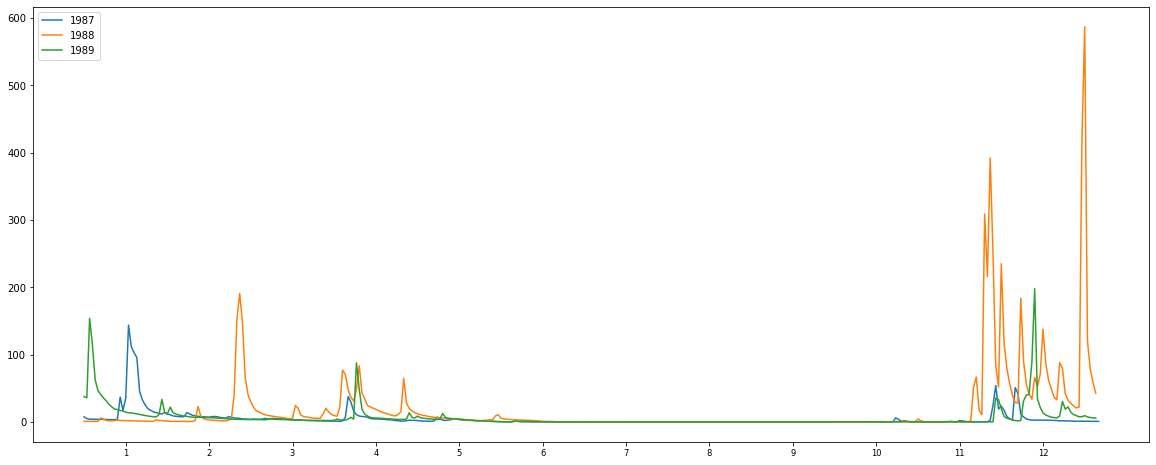

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
for i, group in enumerate(temp.groupby('Year')):
    ax.plot(group[1].Discharge.values)
    plt.xticks(list(range(15,len(group[1]), 30)),group[1].Month.unique(), size='small')
ax.legend(data.Year.unique());

##### Extract seasonal pattern

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.Discharge, period=366)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

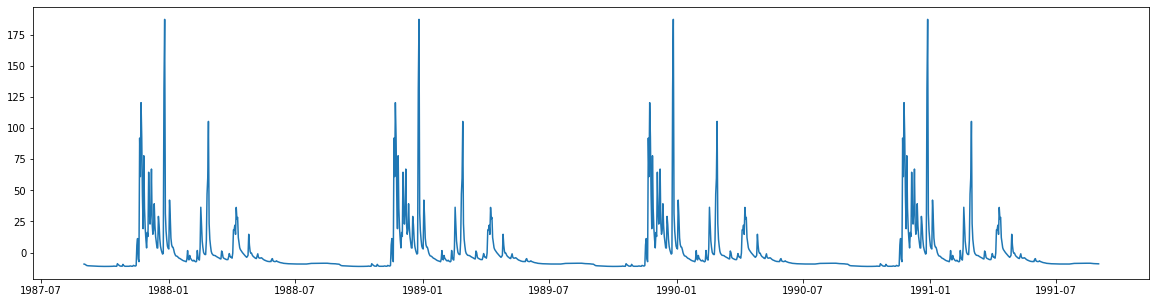

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(seasonal);

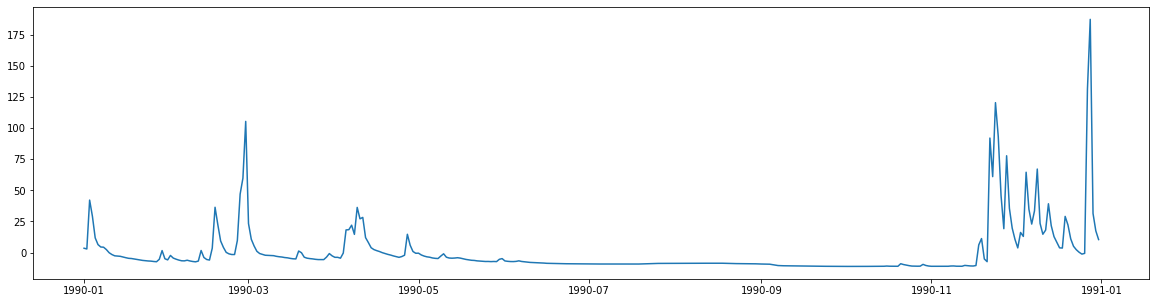

In [14]:
#zoom into 1 year
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(seasonal[data[data.Year==1990].index]);

# Replace missings

In [15]:
data.isna().sum()

Year                   0
Month                  0
Day                    0
season                 0
Rainfall_St1         499
Rainfall_St2          62
Rainfall_St3        1124
Discharge              0
surface_area_St1    1460
Temp                   2
dtype: int64

surface_area is an information of volume of the basin, it remains same for all entries, so we will do a forward fill to keep the informamtion for transformations

In [16]:
data.surface_area_St1.ffill(inplace = True)

In [17]:
data.isna().sum()

Year                   0
Month                  0
Day                    0
season                 0
Rainfall_St1         499
Rainfall_St2          62
Rainfall_St3        1124
Discharge              0
surface_area_St1       0
Temp                   2
dtype: int64

In [18]:
#only two, not much of an influence, best guess ffill or bfill or even better: 
#interpolation between yesterdays and tommorows temp
data[data.Temp.isna()]

,Year,Month,Day,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp
Timestamp,,,,,,,,,,
1990-05-05,1990,5,5,Spring,0.0,0.0,NaN,4.860,1000.0,NaN
1990-10-12,1990,10,12,Autumn,0.0,0.0,NaN,0.212,1000.0,NaN


What does interpolation mean:

In [19]:
data.iloc[975:980]

,Year,Month,Day,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp
Timestamp,,,,,,,,,,
1990-05-03,1990,5,3,Spring,0.0,0.0,NaN,5.71,1000.0,33.1
1990-05-04,1990,5,4,Spring,0.0,0.0,NaN,5.32,1000.0,35.0
1990-05-05,1990,5,5,Spring,0.0,0.0,NaN,4.86,1000.0,NaN
1990-05-06,1990,5,6,Spring,0.0,0.0,NaN,4.51,1000.0,29.5
1990-05-07,1990,5,7,Spring,0.0,0.0,NaN,4.14,1000.0,30.3


In [20]:
data.Temp.interpolate()[977]

32.25

In [21]:
#do for all vlaues in data set
data.Temp = data.Temp.interpolate()

In [22]:
data.isna().sum()

Year                   0
Month                  0
Day                    0
season                 0
Rainfall_St1         499
Rainfall_St2          62
Rainfall_St3        1124
Discharge              0
surface_area_St1       0
Temp                   0
dtype: int64

Replacing Rainfall data - that is very sensitive, because these are our actual values, we should be very careful, how we replace those, as we do not want to add non-real patterns into the data. I would definitely ask back to the experts, what most probably is the reason for missing data. As we cannot now, I have a look onto the visualisations above (see how helpful EDA can be!) and assume that the experts say, sometimes if there was no rain, it was forgotten to enter a zero. Therefore, we will replace missing value with zeros.

In [23]:
data.fillna(value=0, inplace = True)

In [24]:
data.isna().sum()

Year                0
Month               0
Day                 0
season              0
Rainfall_St1        0
Rainfall_St2        0
Rainfall_St3        0
Discharge           0
surface_area_St1    0
Temp                0
dtype: int64

##### Looks good now!

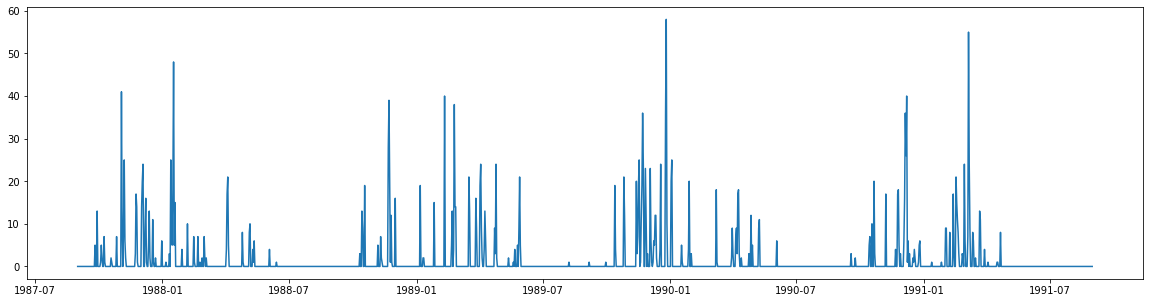

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(data.Rainfall_St1);

# Feature Transformation

In [26]:
data.head()

,Year,Month,Day,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp
Timestamp,,,,,,,,,,
1987-09-01,1987,9,1,Autumn,0.0,0.0,0.0,0.128,1000.0,41.5
1987-09-02,1987,9,2,Autumn,0.0,0.0,0.0,0.128,1000.0,44.5
1987-09-03,1987,9,3,Autumn,0.0,0.0,0.0,0.128,1000.0,43.6
1987-09-04,1987,9,4,Autumn,0.0,0.0,0.0,0.128,1000.0,42.8
1987-09-05,1987,9,5,Autumn,0.0,0.0,0.0,0.128,1000.0,44.7


In [27]:
data.dtypes

Year                  int64
Month                 int64
Day                   int64
season               object
Rainfall_St1        float64
Rainfall_St2        float64
Rainfall_St3        float64
Discharge           float64
surface_area_St1    float64
Temp                float64
dtype: object

### Encoding

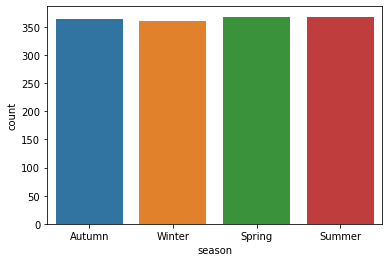

In [28]:
sns.countplot(data=data, x= 'season');

In [29]:
dict_seasons = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}

In [30]:
data.season.map(dict_seasons)

Timestamp
1987-09-01    4
1987-09-02    4
1987-09-03    4
1987-09-04    4
1987-09-05    4
             ..
1991-08-27    3
1991-08-28    3
1991-08-29    3
1991-08-30    3
1991-08-31    3
Name: season, Length: 1461, dtype: int64

In [31]:
data.season = data.season.map(dict_seasons)

In [32]:
data.dtypes

Year                  int64
Month                 int64
Day                   int64
season                int64
Rainfall_St1        float64
Rainfall_St2        float64
Rainfall_St3        float64
Discharge           float64
surface_area_St1    float64
Temp                float64
dtype: object

# Create new features

##### transform mathematical: log, lag...

In [33]:
data.Rainfall_St3

Timestamp
1987-09-01    0.0
1987-09-02    0.0
1987-09-03    0.0
1987-09-04    0.0
1987-09-05    0.0
             ... 
1991-08-27    0.0
1991-08-28    0.5
1991-08-29    0.0
1991-08-30    0.0
1991-08-31    0.0
Name: Rainfall_St3, Length: 1461, dtype: float64

In [34]:
data.Rainfall_St3.shift(1)

Timestamp
1987-09-01    NaN
1987-09-02    0.0
1987-09-03    0.0
1987-09-04    0.0
1987-09-05    0.0
             ... 
1991-08-27    0.0
1991-08-28    0.0
1991-08-29    0.5
1991-08-30    0.0
1991-08-31    0.0
Name: Rainfall_St3, Length: 1461, dtype: float64

In [35]:
data['Rainfall_St1_lag1'] = data.Rainfall_St1.shift(1)

In [36]:
data['Rainfall_St2_lag1'] = data.Rainfall_St2.shift(1)
data['Rainfall_St3_lag1'] = data.Rainfall_St3.shift(1)

##### transform - create new features, enrich information

In [37]:
data.Rainfall_St1 * data.surface_area_St1

Timestamp
1987-09-01    0.0
1987-09-02    0.0
1987-09-03    0.0
1987-09-04    0.0
1987-09-05    0.0
             ... 
1991-08-27    0.0
1991-08-28    0.0
1991-08-29    0.0
1991-08-30    0.0
1991-08-31    0.0
Length: 1461, dtype: float64

In [38]:
#ask Ayouba, what is the correct combination
data['Rainfall_St1_in_m3'] = data.Rainfall_St1 * data.surface_area_St1

In [39]:
data.Rainfall_St1[30:40]

Timestamp
1987-10-01    0.0
1987-10-02    0.0
1987-10-03    0.0
1987-10-04    1.0
1987-10-05    5.0
1987-10-06    2.0
1987-10-07    0.0
1987-10-08    0.0
1987-10-09    7.0
1987-10-10    1.0
Name: Rainfall_St1, dtype: float64

In [40]:
data.Rainfall_St1_in_m3[30:40]

Timestamp
1987-10-01       0.0
1987-10-02       0.0
1987-10-03       0.0
1987-10-04    1000.0
1987-10-05    5000.0
1987-10-06    2000.0
1987-10-07       0.0
1987-10-08       0.0
1987-10-09    7000.0
1987-10-10    1000.0
Name: Rainfall_St1_in_m3, dtype: float64

In [41]:
data.head()

,Year,Month,Day,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Discharge,surface_area_St1,Temp,Rainfall_St1_lag1,Rainfall_St2_lag1,Rainfall_St3_lag1,Rainfall_St1_in_m3
Timestamp,,,,,,,,,,,,,,
1987-09-01,1987,9,1,4,0.0,0.0,0.0,0.128,1000.0,41.5,NaN,NaN,NaN,0.0
1987-09-02,1987,9,2,4,0.0,0.0,0.0,0.128,1000.0,44.5,0.0,0.0,0.0,0.0
1987-09-03,1987,9,3,4,0.0,0.0,0.0,0.128,1000.0,43.6,0.0,0.0,0.0,0.0
1987-09-04,1987,9,4,4,0.0,0.0,0.0,0.128,1000.0,42.8,0.0,0.0,0.0,0.0
1987-09-05,1987,9,5,4,0.0,0.0,0.0,0.128,1000.0,44.7,0.0,0.0,0.0,0.0


In [42]:
#because lag of 1 is not available for the very first entry, we need to cut it
data  = data.iloc[1:,:]

# Go through the process of Machine Learning

Seperate Input Features and Target variable (remember last session)

In [43]:
data.columns

Index(['Year', 'Month', 'Day', 'season', 'Rainfall_St1', 'Rainfall_St2',
       'Rainfall_St3', 'Discharge', 'surface_area_St1', 'Temp',
       'Rainfall_St1_lag1', 'Rainfall_St2_lag1', 'Rainfall_St3_lag1',
       'Rainfall_St1_in_m3'],
      dtype='object')

In [44]:
X = data[['Month', 'season', 'Rainfall_St1',
       'Rainfall_St2', 'Rainfall_St3', 'Temp',
       'Rainfall_St1_lag1', 'Rainfall_St2_lag1', 'Rainfall_St3_lag1']]

In [45]:
y = data.Discharge

In [46]:
#Daten aufteilen
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=30, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=50, random_state=42)

In [48]:
def display_feat_importance(rf):
    df = pd.concat([pd.Series(X_train.columns), pd.Series(rf.feature_importances_)], axis = 1)
    df.columns = ['Attributname', 'Importance']
    return df.sort_values('Importance', ascending = False)

rf_featimp =  display_feat_importance(rf)
rf_featimp

,Attributname,Importance
8,Rainfall_St3_lag1,0.692330
6,Rainfall_St1_lag1,0.129737
7,Rainfall_St2_lag1,0.089515
1,season,0.056763
0,Month,0.019841
5,Temp,0.007025
4,Rainfall_St3,0.003010
3,Rainfall_St2,0.001673
2,Rainfall_St1,0.000106


Last days rain seems to be very important, we can test mor lags

In [49]:
data['Rainfall_St1_lag2'] = data.Rainfall_St1.shift(2)
data['Rainfall_St2_lag2'] = data.Rainfall_St2.shift(2)
data['Rainfall_St3_lag2'] = data.Rainfall_St3.shift(2)

In [50]:
#because lag of 12is not available for the first two entries, we need to cut it
data  = data.iloc[2:,:]

In [51]:
X = data[['Month', 'season', 'Rainfall_St1',
       'Rainfall_St2', 'Rainfall_St3', 'Temp',
       'Rainfall_St1_lag1', 'Rainfall_St2_lag1', 'Rainfall_St3_lag1',
         'Rainfall_St1_lag2', 'Rainfall_St2_lag2',
       'Rainfall_St3_lag2']]
y=y[2:]

In [52]:
#Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=30, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=50, random_state=42)

In [54]:
def display_feat_importance(rf):
    df = pd.concat([pd.Series(X_train.columns), pd.Series(rf.feature_importances_)], axis = 1)
    df.columns = ['Attributname', 'Importance']
    return df.sort_values('Importance', ascending = False)

rf_featimp =  display_feat_importance(rf)
rf_featimp

,Attributname,Importance
8,Rainfall_St3_lag1,0.857155
11,Rainfall_St3_lag2,0.064245
1,season,0.029311
10,Rainfall_St2_lag2,0.017564
3,Rainfall_St2,0.012891
6,Rainfall_St1_lag1,0.006264
0,Month,0.006243
4,Rainfall_St3,0.002255
5,Temp,0.001782
7,Rainfall_St2_lag1,0.001755


### More models

All models are also available for Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error, r2_score #be careful with MAPE

In [56]:
model_dict = {'Decisision Tree': DecisionTreeRegressor(min_impurity_decrease=0.01,random_state=42),
            'Random Forest': RandomForestRegressor(random_state=42)}
            #'k Nearest Neighbour': KNeighborsRegressor(),
            #'SVC': SVR()}#,
            #'Neuronal Net': MLPRegressor(max_iter=2000, random_state=42)}

In [57]:
for name, model in model_dict.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(np.round(mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred),2))
    print(np.round(r2_score(y_true=y_test, y_pred=y_pred),2))

Decisision Tree
3.61
0.56
Random Forest
3.09
0.73


##### Predict the discharge

In [58]:
sample_nb = 100

In [59]:
X_test.iloc[[sample_nb]]

,Month,season,Rainfall_St1,Rainfall_St2,Rainfall_St3,Temp,Rainfall_St1_lag1,Rainfall_St2_lag1,Rainfall_St3_lag1,Rainfall_St1_lag2,Rainfall_St2_lag2,Rainfall_St3_lag2
Timestamp,,,,,,,,,,,,
1990-06-05,6,3,0.0,0.0,1.1,37.6,0.0,0.0,0.2,6.0,20.0,0.0


In [60]:
model_dict['Random Forest'].predict(X_test.iloc[[sample_nb]])

array([4.48358083])

In [61]:
y_test.iloc[[sample_nb]]

Timestamp
1990-06-05    1.2
Name: Discharge, dtype: float64

In [62]:
pd.Series(y_pred, index = y_test.index)

Timestamp
1991-04-16     9.651900
1989-12-18    33.490500
1988-10-21     0.106430
1989-02-07     7.632740
1990-07-05     0.183719
                ...    
1989-07-14     0.174777
1988-05-04     2.817200
1990-07-06     0.153757
1990-03-02     5.676200
1990-04-29    45.593360
Length: 365, dtype: float64

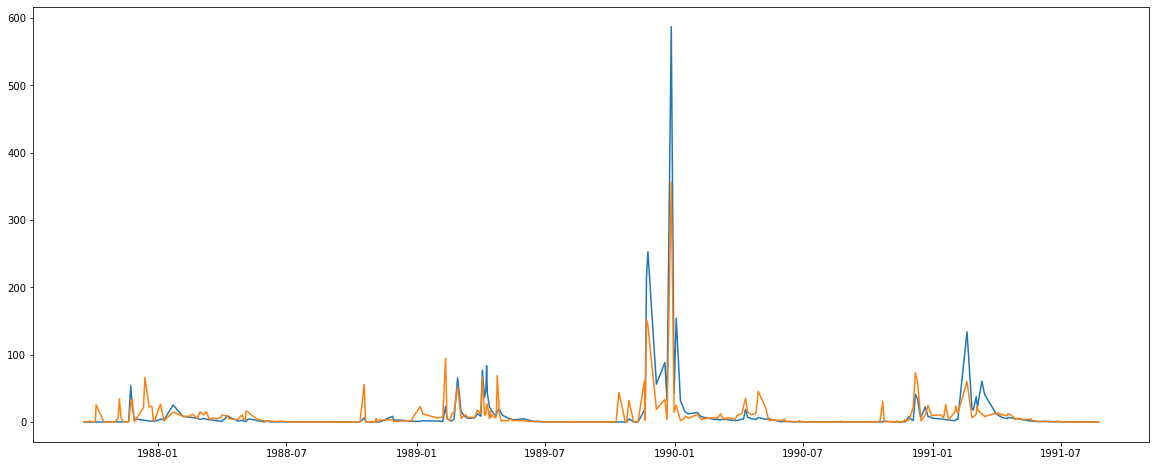

In [63]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(y_test.sort_index())
ax.plot(pd.Series(y_pred, index = y_test.index).sort_index())
#ax.plot(data.Timestamp, data.Discharge.values)
#ax.legend(data.Year.unique());